# 波士顿房价预测案例


**导入房价数据集**

In [5]:
# 导入房价数据集
import  tensorflow as tf
import numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [6]:
# 从外部文件中读取数据
df = pd.read_csv("./data/boston.csv")
# df = pd.DataFrame(df)
print(f"头部数据\n{df.head()}")  # 观察头部数据 
print(f"数据集结构:{df.shape}\n") # 观察数据结构
print(f"数据信息:\n{df.info()}") # 
'''
conut:元素计数
mean:均值
std:标准差
min:最小值
25%/50%/75%:低中高位分位数
'''
print(f"统计分析:\n{df.describe()}")
print(f"相关性分析:\n{df.corr()}")


头部数据
   CRIM      ZN     INDUS   CHAS   NOX      RM      AGE    DIS       RAD   \
0   0.00632   18.0    2.31      0    0.538   6.575   65.2    4.0900     1   
1   0.02731    0.0    7.07      0    0.469   6.421   78.9    4.9671     2   
2   0.02729    0.0    7.07      0    0.469   7.185   61.1    4.9671     2   
3   0.03237    0.0    2.18      0    0.458   6.998   45.8    6.0622     3   
4   0.06905    0.0    2.18      0    0.458   7.147   54.2    6.0622     3   

   TAX   PTRATIO   LSTAT   MEDV  
0   296      15.3    4.98  24.0  
1   242      17.8    9.14  21.6  
2   242      17.8    4.03  34.7  
3   222      18.7    2.94  33.4  
4   222      18.7    5.33  36.2  
数据集结构:(506, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS  

## 数据可视化


array([[<AxesSubplot:title={'center':'CRIM    '}>,
        <AxesSubplot:title={'center':'ZN   '}>,
        <AxesSubplot:title={'center':'INDUS '}>,
        <AxesSubplot:title={'center':'CHAS '}>],
       [<AxesSubplot:title={'center':'NOX    '}>,
        <AxesSubplot:title={'center':'RM    '}>,
        <AxesSubplot:title={'center':'AGE  '}>,
        <AxesSubplot:title={'center':'DIS     '}>],
       [<AxesSubplot:title={'center':'RAD '}>,
        <AxesSubplot:title={'center':'TAX '}>,
        <AxesSubplot:title={'center':'PTRATIO '}>,
        <AxesSubplot:title={'center':'LSTAT '}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

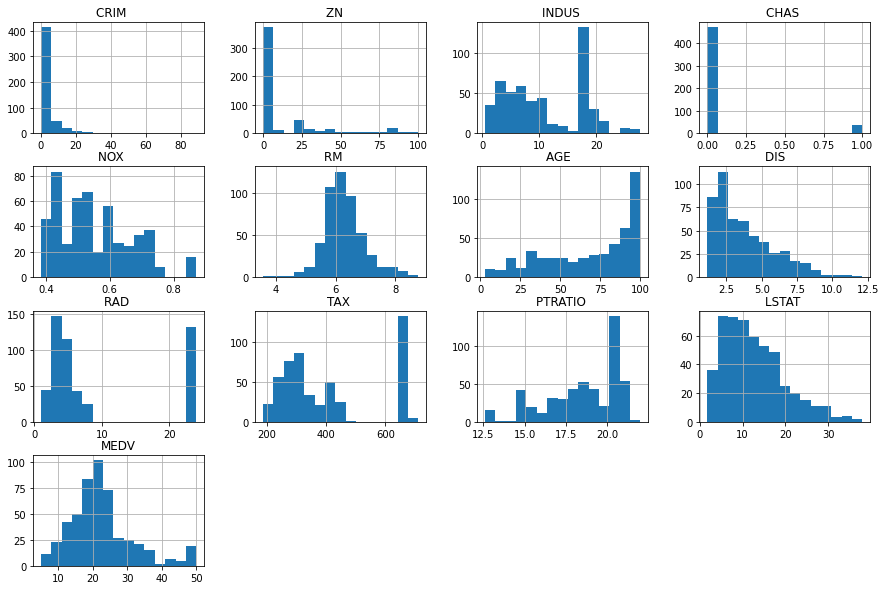

In [7]:
# 设置绘图大小
plt.style.use({'figure.figsize':(15,10)})
# 绘制直方图,分15个分段
df.hist(bins=15)

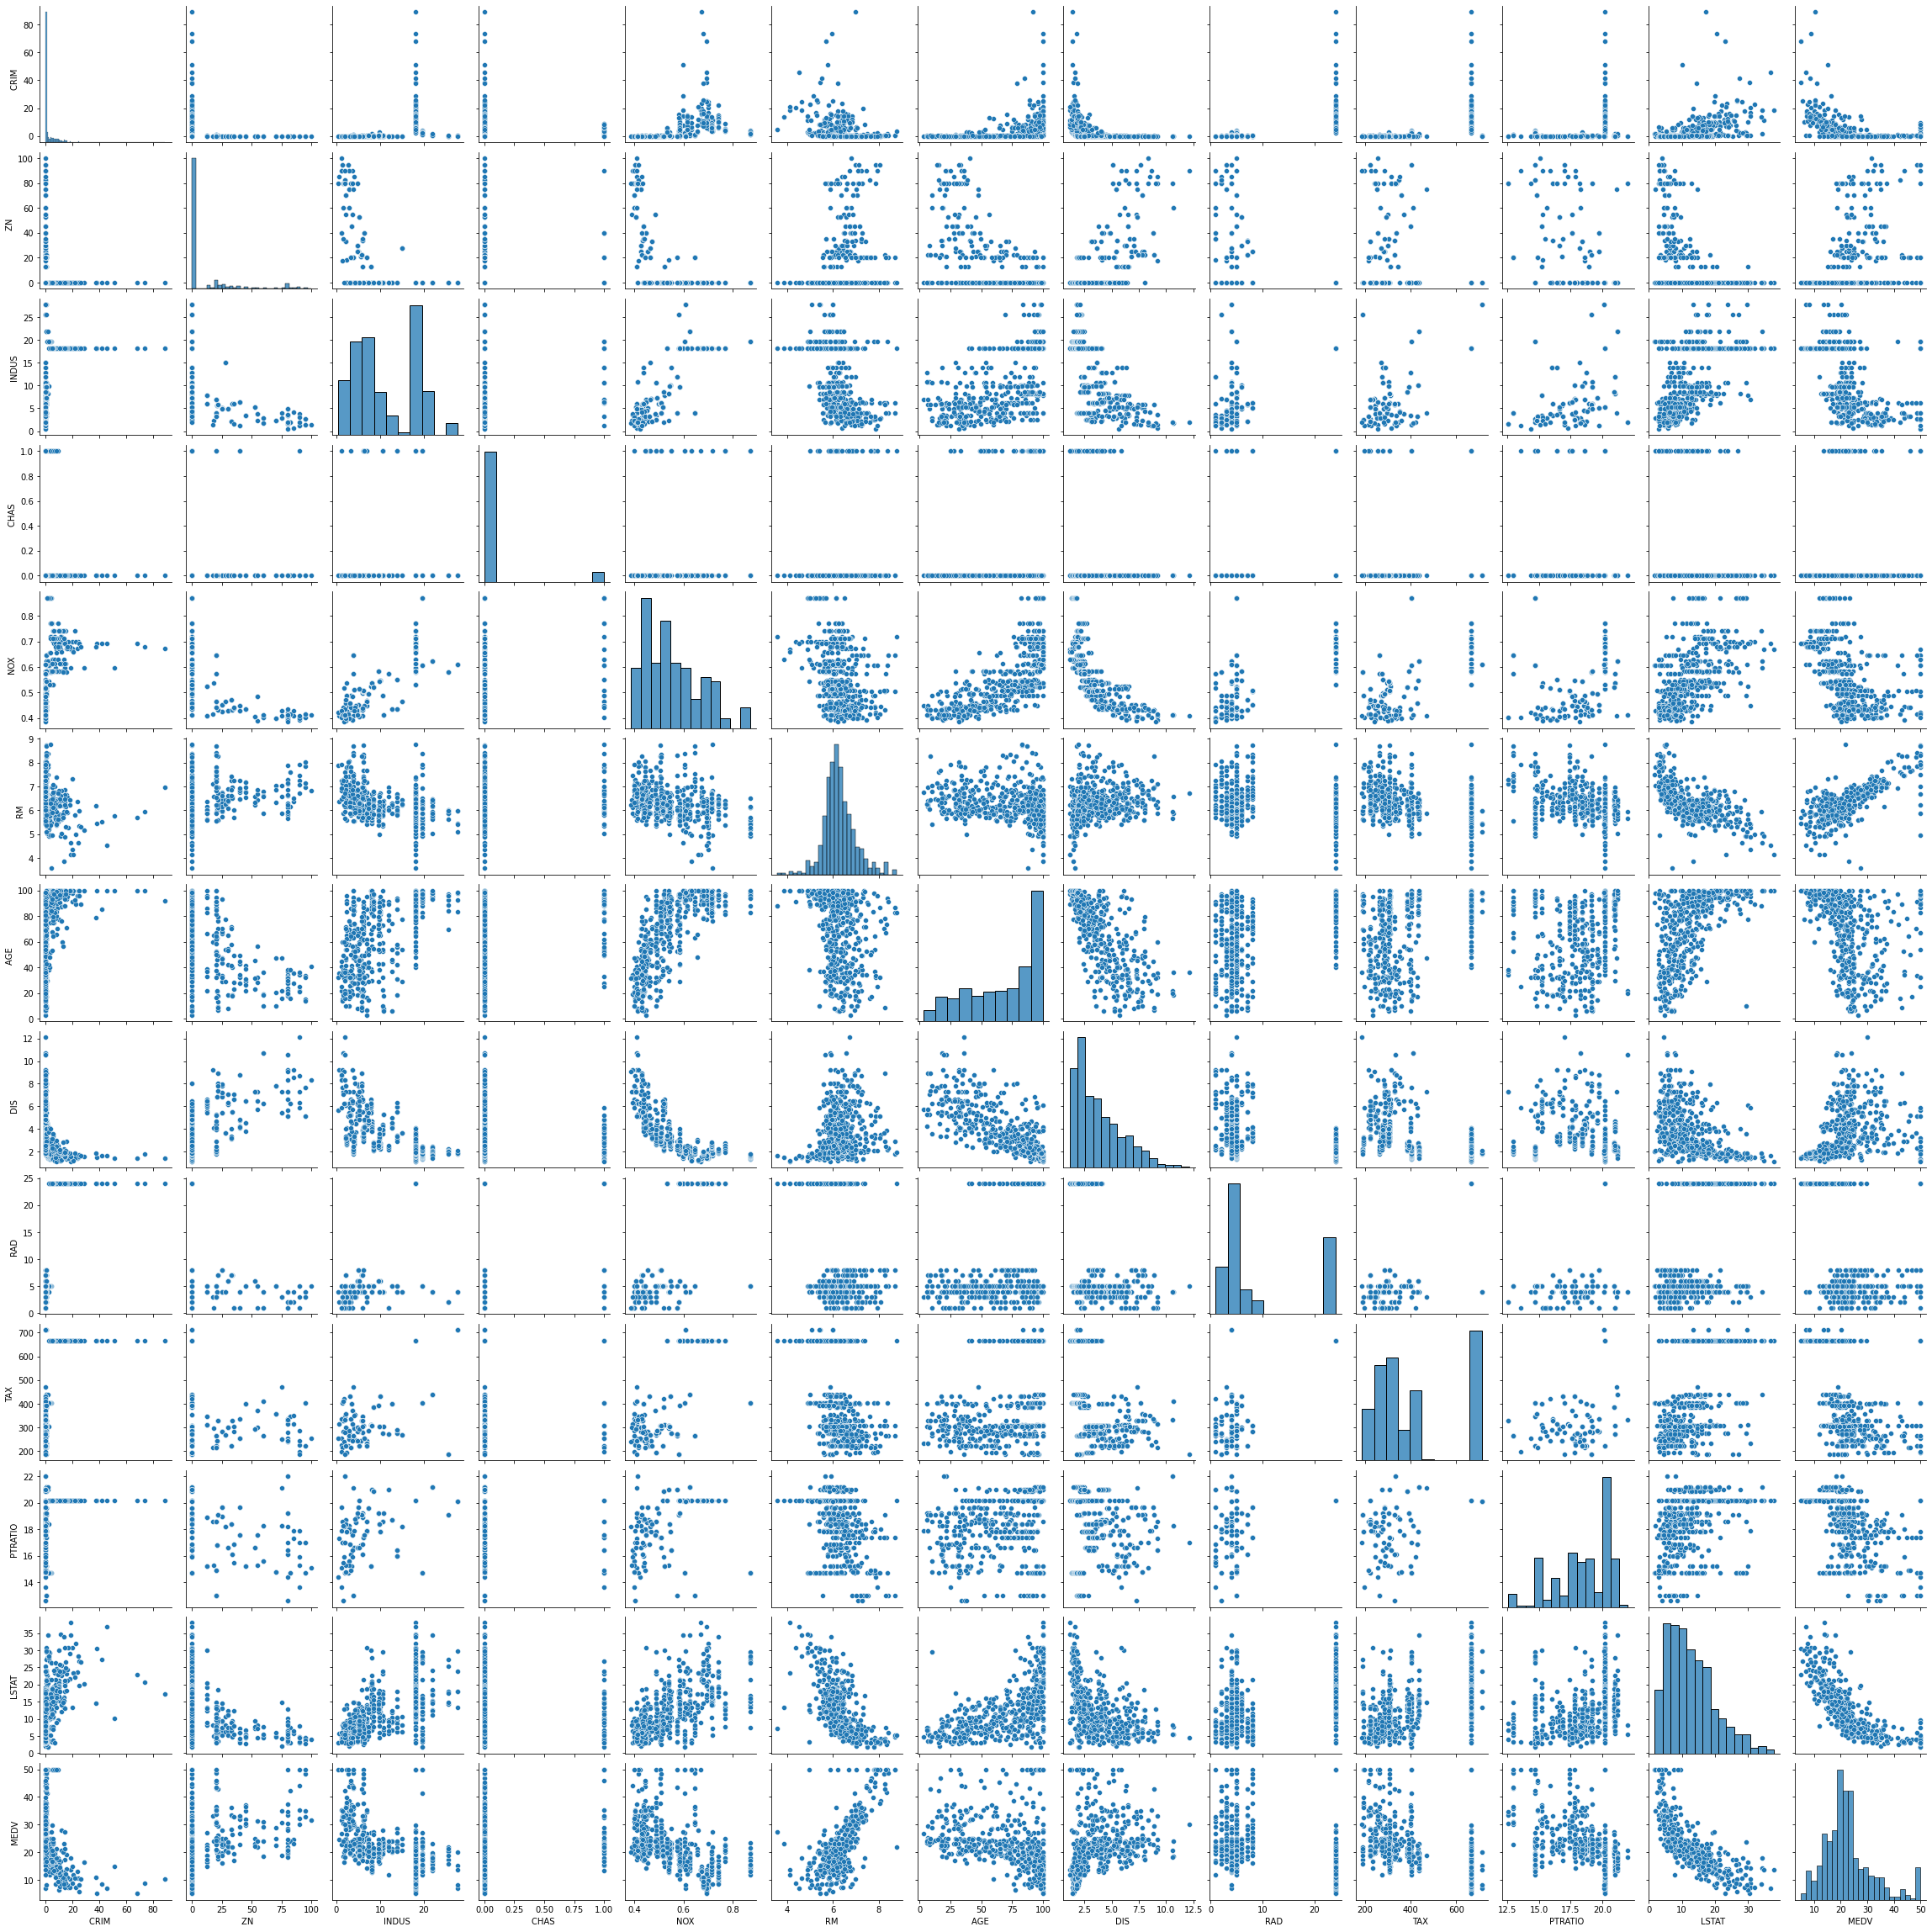

In [8]:
# 安装seaborn库
# ! pip install seaborn 
import seaborn as sns
# 绘制特征数据相关性的散点图
sns.pairplot(df)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

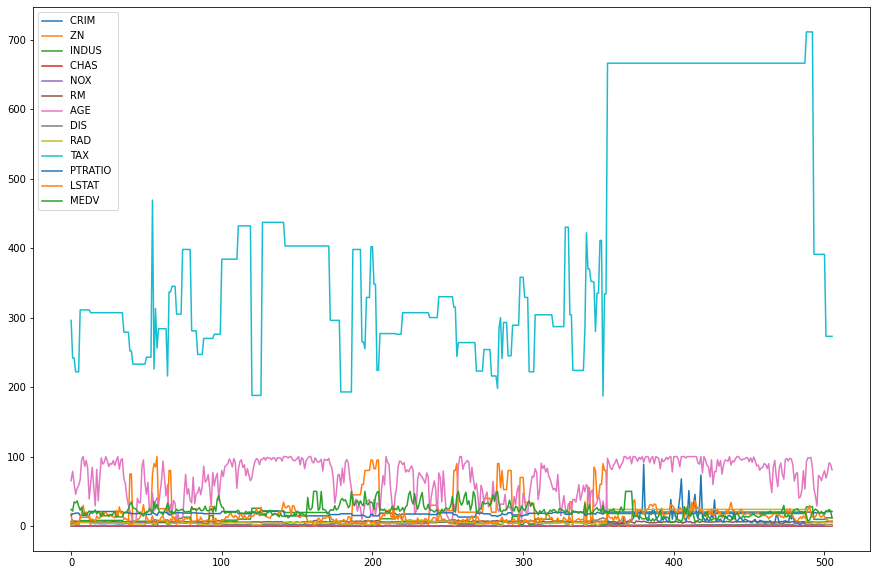

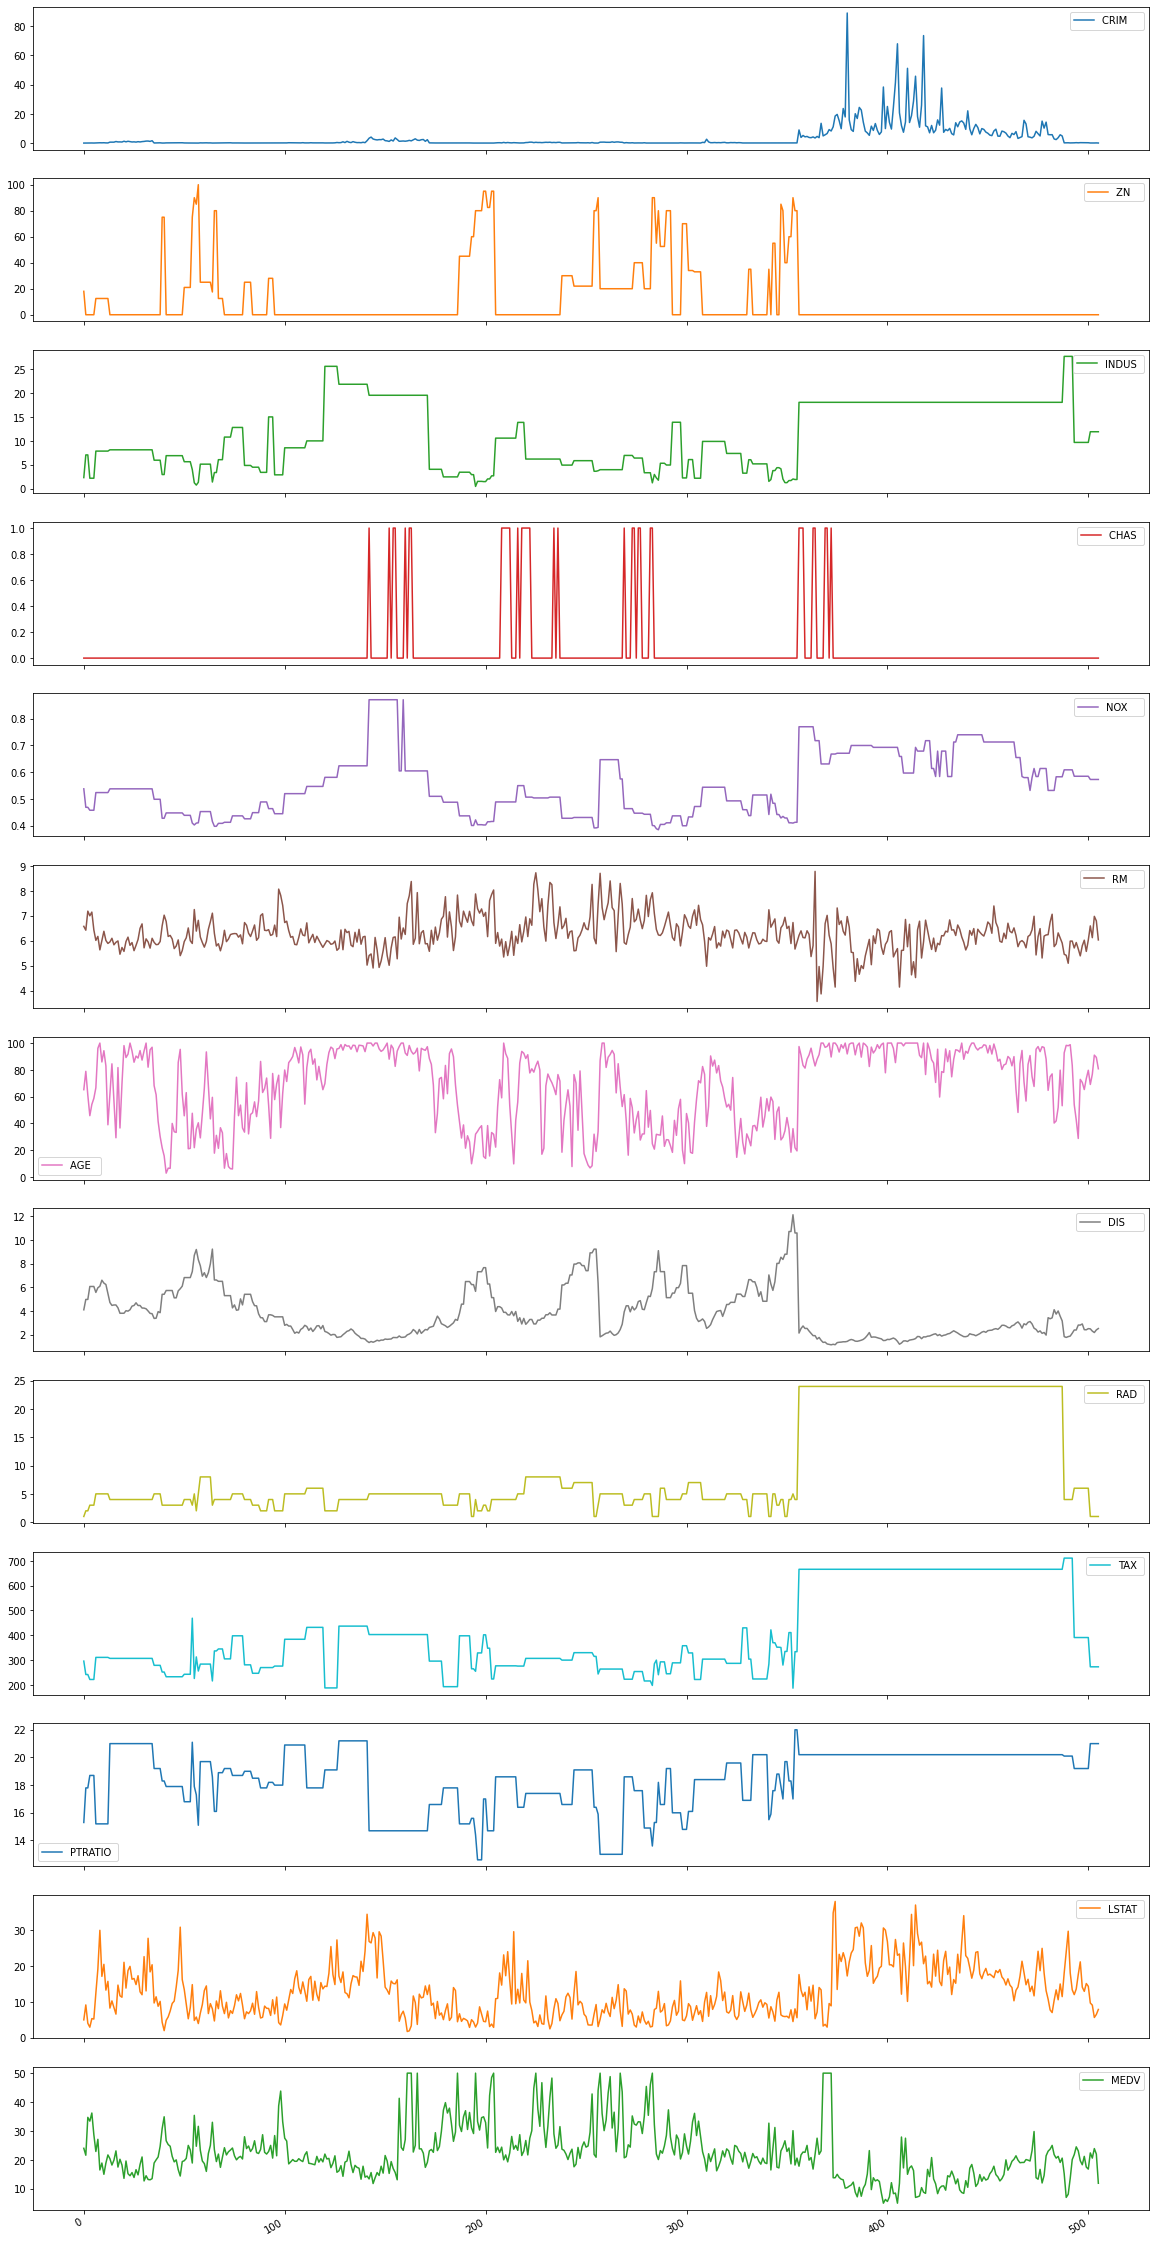

In [9]:
# 绘制观察每个特征的线性图
df.plot()
# 分开绘制
df.plot(subplots=True,figsize=(20,45))

<AxesSubplot:title={'center':'箱型图'}>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 31665 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ouyangzhif

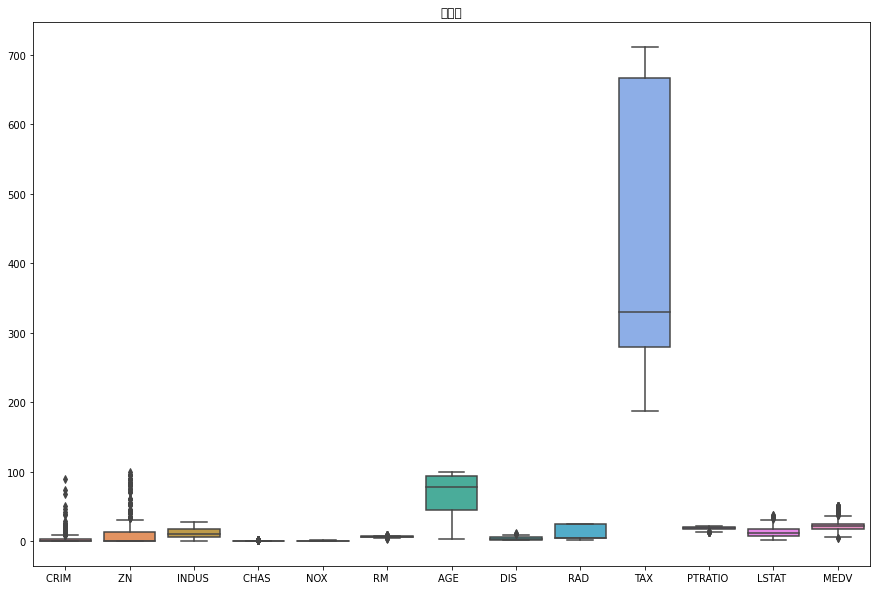

In [10]:
# 绘制箱型图和小提琴图
# 显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title("箱型图")
sns.boxplot(data=df)

<AxesSubplot:title={'center':'小提琴图'}>

/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23567 missing from current fon

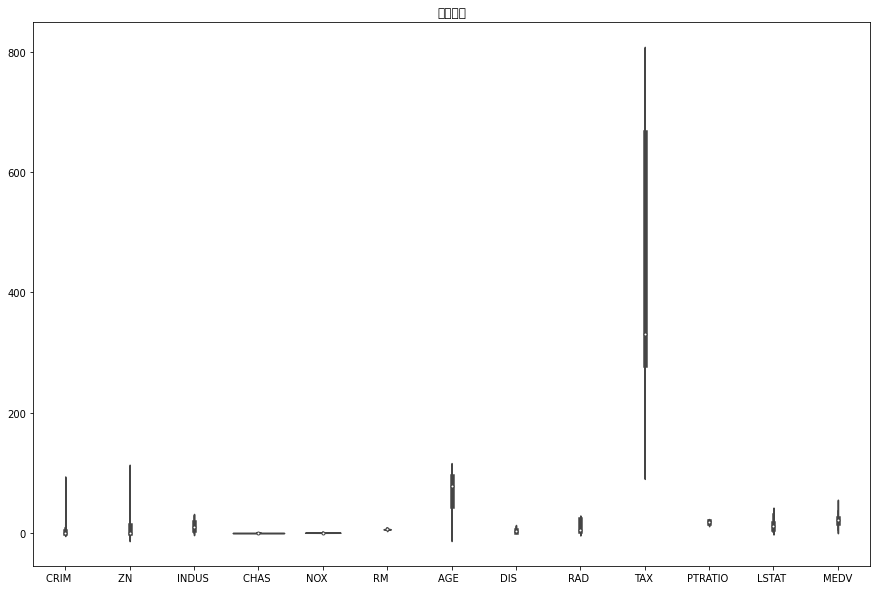

In [11]:
plt.title("小提琴图")
sns.violinplot(data=df)

## 特征选择
使用与目标变量相关性强的变量作为最终的特征变量
通过相关系数进行特征选择

In [12]:
# 构建训练数据集的特征
# 抽去房价中位数作为标签集,其他特征作为训练样本
X_DATA = df.drop(['MEDV'],axis=1)
Y_DATA = df['MEDV']
print(f"源数据集:\n{df.head()}")
print(f"训练样本:\n{X_DATA.head()}")
print(f"标签集:\n{Y_DATA.head()}")

源数据集:
   CRIM      ZN     INDUS   CHAS   NOX      RM      AGE    DIS       RAD   \
0   0.00632   18.0    2.31      0    0.538   6.575   65.2    4.0900     1   
1   0.02731    0.0    7.07      0    0.469   6.421   78.9    4.9671     2   
2   0.02729    0.0    7.07      0    0.469   7.185   61.1    4.9671     2   
3   0.03237    0.0    2.18      0    0.458   6.998   45.8    6.0622     3   
4   0.06905    0.0    2.18      0    0.458   7.147   54.2    6.0622     3   

   TAX   PTRATIO   LSTAT   MEDV  
0   296      15.3    4.98  24.0  
1   242      17.8    9.14  21.6  
2   242      17.8    4.03  34.7  
3   222      18.7    2.94  33.4  
4   222      18.7    5.33  36.2  
训练样本:
   CRIM      ZN     INDUS   CHAS   NOX      RM      AGE    DIS       RAD   \
0   0.00632   18.0    2.31      0    0.538   6.575   65.2    4.0900     1   
1   0.02731    0.0    7.07      0    0.469   6.421   78.9    4.9671     2   
2   0.02729    0.0    7.07      0    0.469   7.185   61.1    4.9671     2   
3   0.03237  

In [13]:
# 特征选取
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # 计算自变量和因变量的相关系数,然后计算出F和P值
# 只保留 k 个最高相关性F值的特征
SelectKBest = SelectKBest(f_regression,k=3)
bestFeature = SelectKBest.fit_transform(X_DATA,Y_DATA)  # 使用适配器转换数据 
SelectKBest.get_support()  # 获取保留的特征索引
X_DATA.columns[SelectKBest.get_support()]  # 查看保留的特征

Index(['RM    ', 'PTRATIO ', 'LSTAT '], dtype='object')

In [14]:
'''
对特征值进行归一化处理
线性函数归一化极差归一化 
        公式: x=(x-mina(x))/(max(x)-min(x))
        使每个值都映射在[0,1]之间,
        用统一标准衡量来提升模型收敛速度
'''
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
print(f"未归一化:\n{df.head()}")
# 对每组特征值进行归一化处理
for i in df.columns:
    df[i] = scaler.fit_transform(df[[i]])
print(f"归一化后:\n{df.head()}")


未归一化:
   CRIM      ZN     INDUS   CHAS   NOX      RM      AGE    DIS       RAD   \
0   0.00632   18.0    2.31      0    0.538   6.575   65.2    4.0900     1   
1   0.02731    0.0    7.07      0    0.469   6.421   78.9    4.9671     2   
2   0.02729    0.0    7.07      0    0.469   7.185   61.1    4.9671     2   
3   0.03237    0.0    2.18      0    0.458   6.998   45.8    6.0622     3   
4   0.06905    0.0    2.18      0    0.458   7.147   54.2    6.0622     3   

   TAX   PTRATIO   LSTAT   MEDV  
0   296      15.3    4.98  24.0  
1   242      17.8    9.14  21.6  
2   242      17.8    4.03  34.7  
3   222      18.7    2.94  33.4  
4   222      18.7    5.33  36.2  
归一化后:
   CRIM      ZN       INDUS   CHAS    NOX        RM         AGE    DIS       \
0  0.000000   0.18  0.067815    0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236   0.00  0.242302    0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236   0.00  0.242302    0.0  0.172840  0.694386  0.599382  0.348962   
3  0.

## 回归问题评估指标
1. 单变量线性回归和多元线性回归
    1. 单变量线性回归:只有一个自变量,回归拟合结果为一条直线
    2. 多元线性回归:存在多个自变量,每个自变量都有自己的系数,回归拟合结果为多维空间的超平面
2. 模型评估方法
    1. 平均绝对误差
    2. 均方误差
    3. 均方根误差
    4. 均方根对数误差
    5. R平方可决系数
    6. A-R平方 修正R平方
    

In [15]:
import  tensorflow as tf
import numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # 划分训练集和测试集
from sklearn.linear_model import LinearRegression  #  线性回归模型
from sklearn import metrics  # 评分
import math
# 从外部文件中读取数据
df = pd.read_csv("./data/boston.csv")

# 抽取房价中位数作为标签集,其他为特征集
X_DATA = df.drop(['MEDV'],axis=1)
y_DATA = df['MEDV']

# 划分训练集和测试集的特征X和标签y
X_train,X_test,y_train,y_test = train_test_split(X_DATA,y_DATA)

# 导入线性回归模型
model = LinearRegression()
# 用回归模型拟合训练集的特征和标签
model.fit(X_train,y_train)

# 输入测试集进行预测结果
y_predict = model.predict(X_test)
print(f"预测结果:\n{y_predict}")
print(f"正确标签:\n{y_test}")
print(f"模型评估:{model.score(X_test,y_test)}")
'''
metrics.mean_absolute_error(y_test,y_predict):平均绝对误差MAE
计算预测值和真实值之间的绝对值差之和的均值
MAE =( ∑n|y-Y| )/ n
'''
print(f"平均绝对误差对比评估:\n{metrics.mean_absolute_error(y_test,y_predict)}")
'''
metrics.mean_squared_error():均方误差MSE
计算预测值和真实值之差平方和的均值
MSE = ( ∑n(y-Y)^2 ) / n
'''
print(f"均方误差对比评估:\n{metrics.mean_squared_error(y_test,y_predict)}")
'''
sqrt(metrics.mean_squared_error()):均方根误差RMSE
计算预测值和真实值之差平方和的均值的平方根
MSE = sqrt(( ∑n(y-Y)^2 ) / n)
'''

print(f"均方根误差对比评估:\n{math.sqrt(metrics.mean_squared_error(y_test,y_predict))}")
'''
sqrt(metrics.mean_squared_error()):均方根对数误差RMSLE
计算预测值和真实值对数之差平方和的均值的平方根
MSE = sqrt(( ∑n(log(y+1)-log(Y+1))^2 ) / n)
'''

print(f"均方根对数误差对比评估:\n{math.sqrt(metrics.mean_squared_error(y_test,y_predict))}")


预测结果:
[17.16141798 15.06043445 17.49455741 18.6579931  21.89041892 16.89609565
 17.54861728 21.36817714 10.20099718 36.07024142 41.75594255 32.75867814
 16.84423791 24.4190864  13.61316962 14.24334609 24.30486778 33.86475509
 20.63690713  3.99773464 16.93347243 15.62712494 22.712838   30.09344588
 15.17493772 21.31131138 14.1166217  31.97476367  2.84860148 16.01600902
 14.88384612 21.39580843 23.39267125 29.03841777 17.19670333 16.03822345
 12.98935011  3.40283234 21.14891805 18.12437195 16.38745903 36.45619647
 20.17882487 29.28627071 20.81857561 22.50810273 24.93570865 17.8475112
  8.73395036 24.34219413 20.55774582 24.10422775 26.76875001 22.08493454
 24.29157234 25.84127525 18.9046822  24.60531991 19.18671362 11.61137844
 23.15763795 19.60561195 29.24103527 19.0553234  10.1875125  25.85965525
 35.67217381 34.32418726 14.40693496 16.18617257 28.24606181 24.12550356
 30.59682628 15.98668768 20.08907263 31.34948799 22.35614212 13.56978476
  6.42150381 15.79679415 35.34498814 25.837535

## 线性回归

1. 简单线性回归

In [16]:
# 导入波士顿数据集
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split  # 划分训练集和测试集
from sklearn.linear_model import LinearRegression  #  线性回归模型
from sklearn import metrics  # 评分
import math

Boston = load_boston()
# 抽取特征集和标签集
X_DATA = Boston.data
y_DATA = Boston.target

# 划分训练集和测试集的特征标签,其中测试集占比20%
X_train,X_test,y_train,y_test = train_test_split(X_DATA,y_DATA,test_size=0.2)

# 实例化一个线性回归模型对象
liner_model = LinearRegression()
# 拟合训练集数据
liner_model.fit(X_train,y_train)
# 评估模型
SCORE = liner_model.score(X_test,y_test)

# 获取测试集的预测结果
y_predict = liner_model.predict(X_test)
# 评估测试集和预测集
MSE = metrics.mean_squared_error(y_test,y_predict)
print(f'''模型评估:{SCORE}
均方误差:{MSE}''')

模型评估:0.7545720881666793
均方误差:16.139146046088715
